<a href="https://colab.research.google.com/github/vitorwogel/MVP-Data-Analytics/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Vitor André B. Wogel Costa

**Dataset:** [English Premier League - Player Stats - 24/25](https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema

No futebol, além do talento dos jogadores, existem áreas de estudo sobre o jogo, como a análise de dados, que buscam responder questões relevantes para que as equipes se apoiem nos resultados obtidos para tomadas de decisão.

Este trabalho, baseado no dataset [English Premier League - Player Stats - 24/25](https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425), disponibilizado no Kaggle, tem como objetivo analisar e descrever as características mais relevantes a um atleta de futebol que o levam a marcar mais gols.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe um conjunto de características comuns aos maiores artilheiros?

- É possível agrupar jogadores com características comuns e definir aqueles com maior tendência de marcar gol?

## Tipo de Problema

Este é um problema de **aprendizado não supervisionado**, onde se busca compreender padrões entre os diferentes jogadores e agrupá-los de forma a entender quais são aqueles mais propensos a marcar gols.

## Seleção de Dados

O dataset escolhido é composto por 562 jogadores de todos os times da principal divisão da liga inglesa de futebol. Além disso, 57 colunas definem o conjunto global de características individuais de cada jogador, sendo grande parte numérica.

Com isso, é esperado que hajam exemplos e variáveis suficientes para fazer uma boa análise exploratória e conseguir responder de forma assertiva as perguntas elencadas na definição e hipóteses do problema.

## Atributos do Dataset

**A definir o conjunto principal de características que será utilizado**

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregamento do dataset
url = "https://raw.githubusercontent.com/vitorwogel/MVP-Data-Analytics/main/epl_player_stats_24_25.csv"
df = pd.read_csv(url)

In [3]:
# primeiras linhas
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset selecionado, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset escolhido possui 562 instâncias (observações), com diversas características diferentes, das quais nem todas serão utilizadas por não representarem de forma objetiva correlação com a variável principal (*Goals*).

Quatro variáveis que identificam os jogadores individualmente são categóricas (*Player name*, *Club*, *Nationality* e *Position*), além dessas, existem outras variáveis referentes a porcertagem que estão classificadas como categóricas, no entando será avaliada a possibilidade de estas serem discretizadas.

In [9]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 517

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 561
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Player Name                517 non-null    object
 1   Club                       517 non-null    object
 2   Nationality                517 non-null    object
 3   Position                   517 non-null    object
 4   Appearances                517 non-null    int64 
 5   Minutes                    517 non-null    int64 
 6   Goals                      517 non-null    int64 
 7   Assists                    517 non-null    int64 
 8   Shots                      517 non-null    int64 
 9   Shots On Target            517 non-null    int64 
 10  Conversion %               517 non-null    object
 11  Big Chances Missed         517 non-null    int64 
 12  Hit Woodwork               517 non-null    int64 
 13  Offsides         

Visto que o objetivo do trabalho é separar grupos de jogadores mais propensos a marcar gols, podemos eliminar de imediato colunas que não possuem nenhuma correlação com funções ofensivas dentro de campo, sendo elas exclusivamente defensivas ou função de goleiro.

In [5]:
to_drop = [
    "Clean Sheets",
    "Clearances",
    "Interceptions",
    "Blocks",
    "Tackles",
    "Ground Duels",
    "gDuels Won",
    "gDuels %",
    "Aerial Duels",
    "aDuels Won",
    "aDuels %",
    "Goals Conceded",
    "xGoT Conceded",
    "Own Goals",
    "Fouls",
    "Yellow Cards",
    "Red Cards",
    "Saves",
    "Saves %",
    "Penalties Saved",
    "Clearances Off Line",
    "Punches",
    "High Claims",
    "Goals Prevented"
]

df = df.drop(to_drop, axis=1)

Baseando-se no contexto de partidas de futebol, goleiros raramente são responsáveis por marcar gols, podendo assim gols feitos por goleiros serem considerados como *outliers* nesta análise.

Portanto, excluiremos todas as linhas em que o jogador pertence a esta posição.

In [6]:
df["Position"].unique()

array(['DEF', 'MID', 'GKP', 'FWD'], dtype=object)

In [7]:
df = df[df["Position"] != "GKP"]

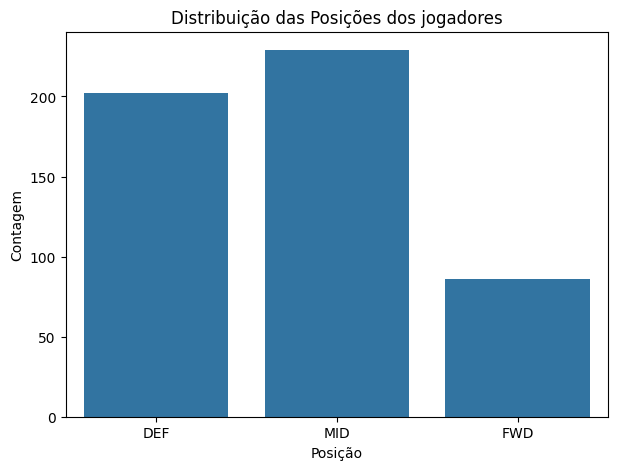

In [8]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Position', data=df)
plt.title('Distribuição das Posições dos jogadores')
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.show()

O gráfico ilustrado mostra que as classes de posição dos jogadores estão um tanto desbalanceadas, sendo a maior parte do dataset composto por defensores ou meio-campistas.

Esta composição pode interferir negativamente na análise, visto que o objetivo é agrupar jogadores com maior potencial de marcar gols, e esta é uma função geralmente atribuída à atacantes.

Para tentar balancear um pouco mais o dataset e focar no objetivo da análise serão excluídos todos os jogadores que não possuem gols marcados e então será análisada novamente a distribuição por posição.

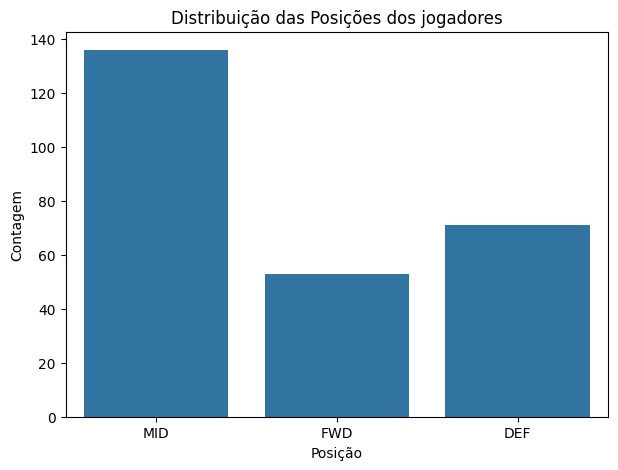

In [14]:
df = df[df["Goals"] > 0]

plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Position', data=df)
plt.title('Distribuição das Posições dos jogadores')
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.show()

In [15]:
df["Player Name"].count()

np.int64(260)

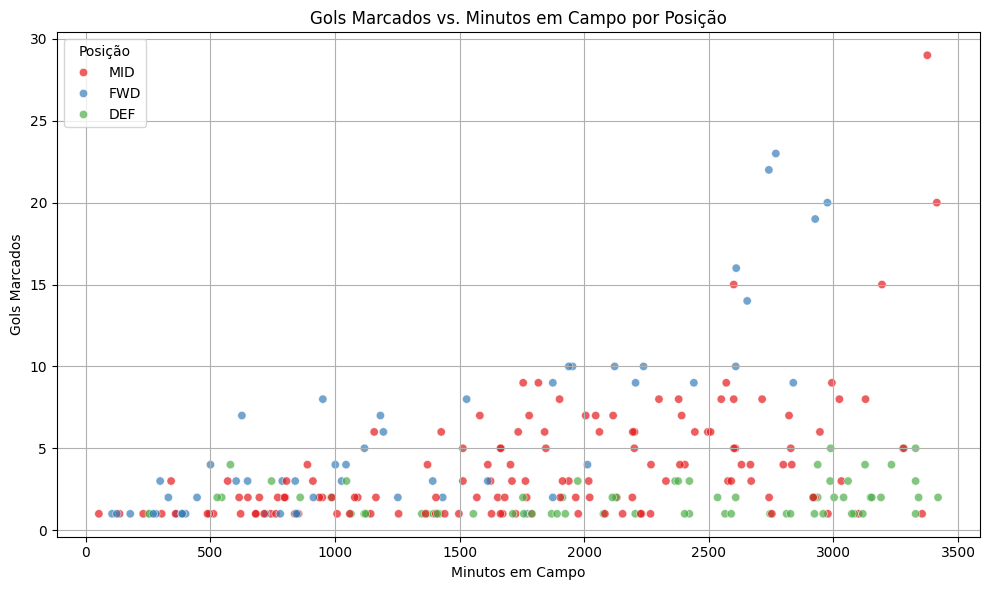

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Minutes",
    y="Goals",
    hue="Position",  # Cores por grupo de posição
    palette="Set1",  # Paleta de cores (opcional)
    alpha=0.7
)

plt.title("Gols Marcados vs. Minutos em Campo por Posição")
plt.xlabel("Minutos em Campo")
plt.ylabel("Gols Marcados")
plt.legend(title="Posição")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do gráfico acima, é possível analisar que até a faixa de 10 gols marcados a influência de minutagem jogada não é tão assintosa quanto quando passamos dessa margem, não existindo instâncias com mais de 10 gols e menos de 2500 minutos jogados na temporada.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [17]:
# estatísticas descritivas básicas do dataset
df.describe()

,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Big Chances Missed,Hit Woodwork,Offsides,Touches,...,Successful fThird Passes,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,27.453846,1788.830769,3.696154,1.942308,30.103846,8.326923,3.811538,0.865385,3.796154,1152.142308,...,167.365385,3.238462,208.515385,109.369231,0.465385,0.661538,5.369231,5.100000,72.869231,20.661538
std,8.003968,909.704069,4.047496,2.751016,23.268966,10.544118,4.478074,1.202135,4.886431,707.829347,...,142.198679,4.761986,162.158306,90.571087,1.084621,1.224296,8.096082,6.550487,54.787323,16.559267
min,4.000000,52.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.750000,997.500000,1.000000,0.000000,13.000000,1.000000,1.000000,0.000000,1.000000,555.500000,...,43.750000,0.000000,80.750000,37.000000,0.000000,0.000000,0.000000,0.000000,34.750000,8.000000
50%,29.000000,1789.500000,2.000000,1.000000,24.000000,4.000000,2.000000,0.500000,2.000000,1089.000000,...,149.000000,2.000000,203.000000,100.000000,0.000000,0.000000,2.000000,3.000000,70.000000,17.000000
75%,34.000000,2590.000000,5.000000,3.000000,40.250000,12.000000,5.000000,1.000000,5.000000,1599.000000,...,251.250000,4.000000,323.750000,174.500000,0.000000,1.000000,8.000000,7.000000,110.000000,29.250000
max,38.000000,3420.000000,29.000000,18.000000,130.000000,61.000000,27.000000,6.000000,28.000000,3347.000000,...,639.000000,27.000000,770.000000,494.000000,9.000000,9.000000,44.000000,35.000000,229.000000,93.000000


In [29]:
total_goals = df['Goals'].sum()
total_goals

np.int64(961)

In [30]:
df_scorers = df[(df["Goals"] <= 5) & (df["Goals"] > 0)]
df_top_scorers = df[df["Goals"] > 5]

print(f"Scorers: {df_scorers['Player Name'].count()}")
print(f"Top Scorers: {df_top_scorers['Player Name'].count()}")

print(f"Scorers goals: {df_scorers['Goals'].sum()}")
print(f"Top Scorers goals: {df_top_scorers['Goals'].sum()}")

print(f"Scorers goals %: {(df_scorers['Goals'].sum() / total_goals) * 100:.2f}%")
print(f"Top Scorers goals %: {(df_top_scorers['Goals'].sum() / total_goals) * 100:.2f}%")

Scorers: 206
Top Scorers: 54
Scorers goals: 431
Top Scorers goals: 530
Scorers goals %: 44.85%
Top Scorers goals %: 55.15%


Através do método *describe* do dataframe pandas, foi possível observar que 75% dos jogadores marcaram até 5 gols, o que gerou a curiosidade de analisar o quanto os maiores artilheiros da liga são responsáveis pelo número total de gols.

O mais interessante é que apenas 54 jogadores são responsáveis por marcar mais de 55% dos gols na temporada.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


In [ ]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

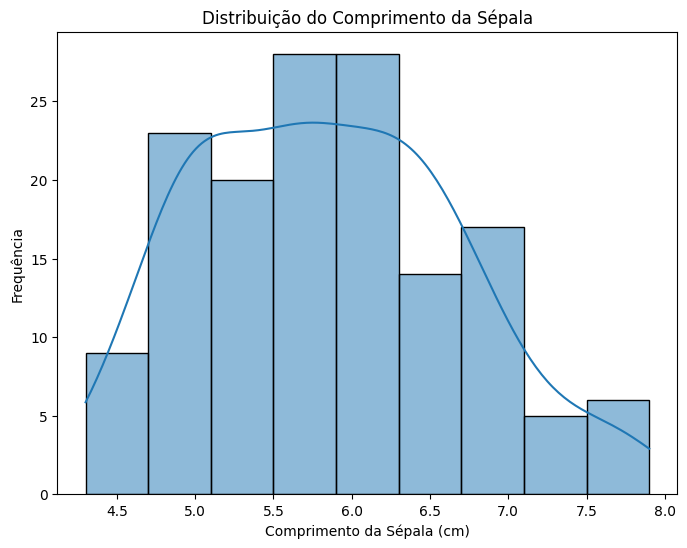

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

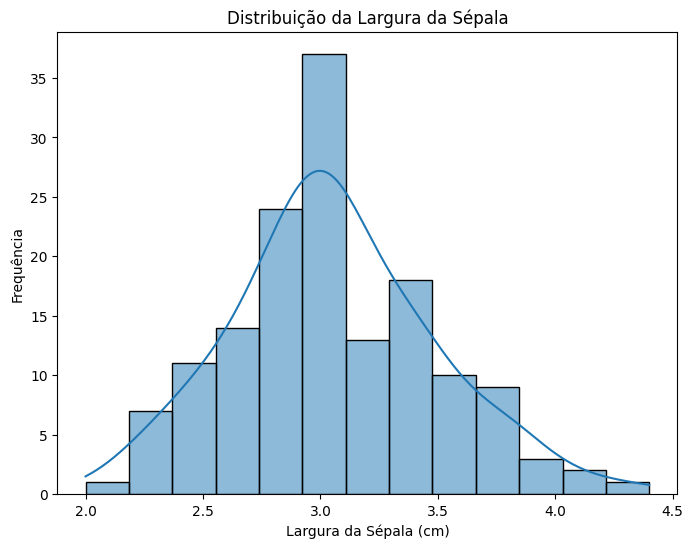

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### *petal length* por Espécie


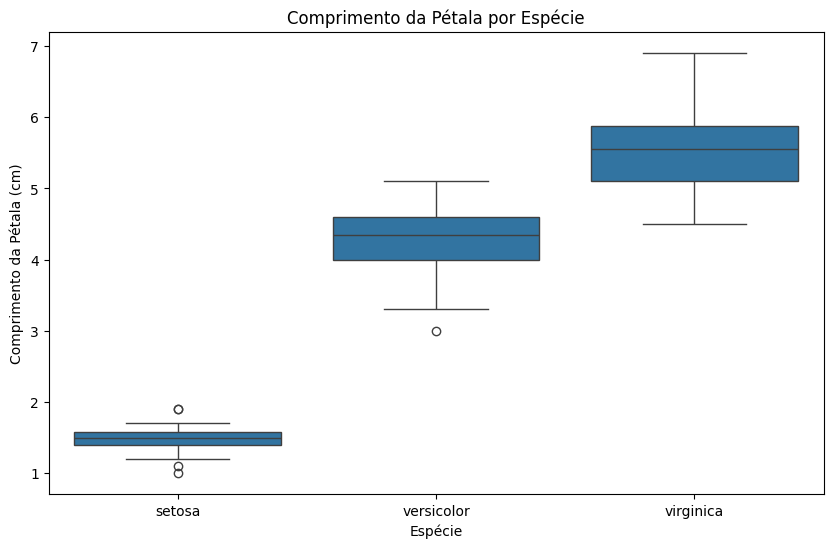

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

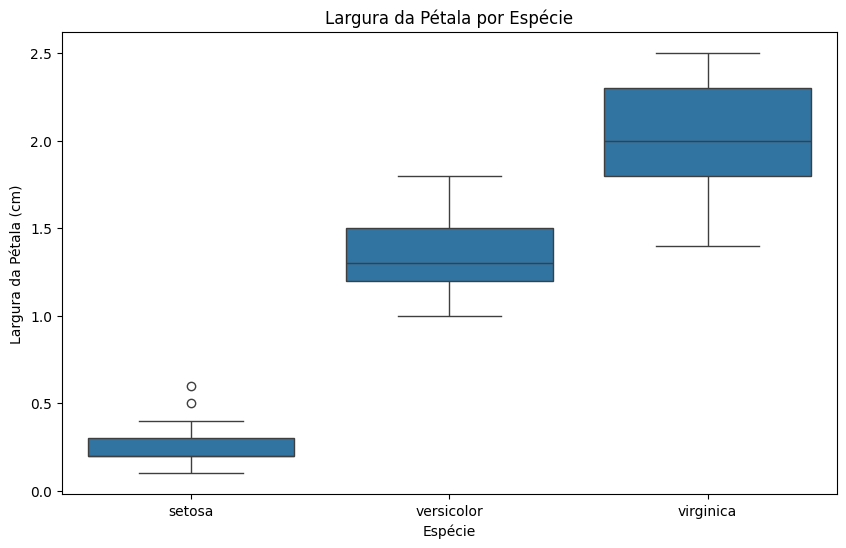

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


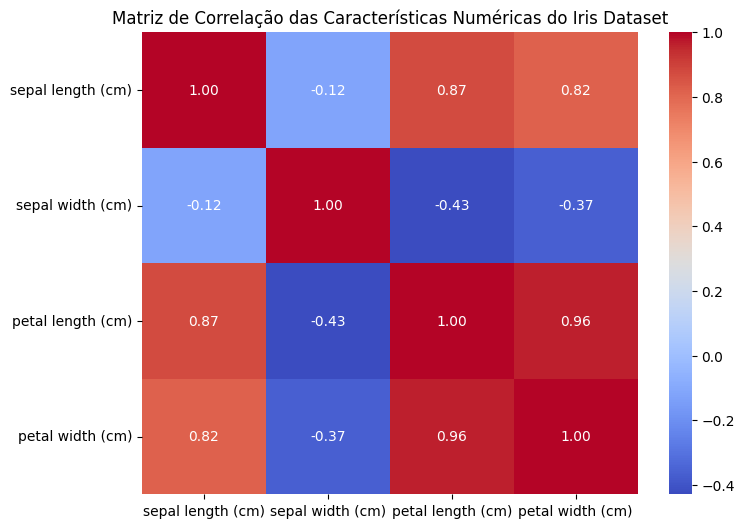

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


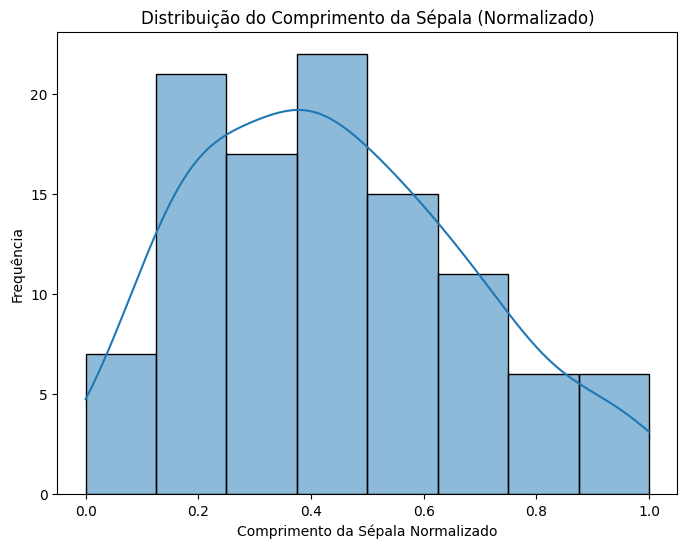

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


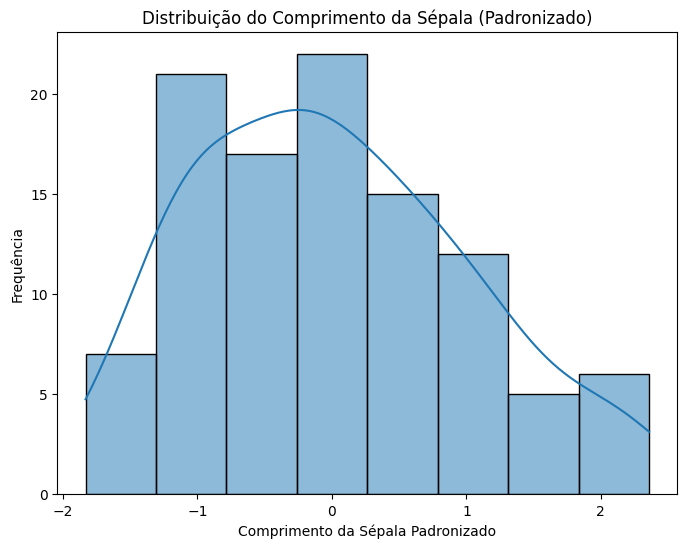

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.